# EDA on Penguins

In this notebook exercise, we will conduct simple EDA steps on the popular penguins dataset.

### Load the dataset

Dataset source: https://github.com/allisonhorst/palmerpenguins

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('penguins')

In [3]:
df.shape

(344, 7)

# Step 1 Understand the Features

You can find information about this dataset here: https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris

**Question: in your own words**:
1. describe each feature
2. mention its type (numeric or categorical)
3. write its name in Arabic

Note: use a Markdown cell.

# Categorical :
- Three penguin species Adelie, Gentoo, Chinstrap 
- Penguin in Three island Biscoe, 
Drea,m
Torgersein Antractica 
- sex (female or male
   

# Numerical :
- bill length in mm (طول الجزء الاعلى من منقار البطريق)
- bill depth in mm (عمق الجزء الاعلى من منقار البطريق)
- flipper length in mm (طول زعانف البطريق)
- body_mass in g   

Hint: you can attach an image to illustrate what the features are.

<img src="https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/culmen_depth.png" width="400">

# Step 2

- Have a look at the columns and their values (`head`, `sample`, `tail`)
- Look at the technical information (`info`)

In [4]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


In [6]:
df.sample()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
173,Chinstrap,Dream,48.5,17.5,191.0,3400.0,Male


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [9]:
df['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

# Step 3

1. For each column, check and handle missing values; state your strategy and justify it. Examples:
    - Strategy: drop the column. Justification: 2 missing values in Body mass won't make a big difference if dropped
    - Strategy: fill missing values. since it's numeric I used the mean
    - Strategy: drop the row. sex 11 dropped, replacing it with other values won't be accurate.
1. Calculate count and percentage of missing values before handling them
1. Check and handle duplicated rows
1. Calculate the percentage of data loss after cleaning

In [10]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [11]:
df.duplicated().sum()

0

Method 1

In [12]:
missing_percentage = (df.isnull().mean().mean() * 100)
print("Percentage of Missing Values in the Whole DataFrame: {:.2f}%".format(missing_percentage))

Percentage of Missing Values in the Whole DataFrame: 0.79%


Method 2

In [13]:
total_missing_count = df.isnull().sum().sum()

# Calculate the total number of cells in the DataFrame
total_cells = df.size

# Calculate the percentage of missing values in the whole DataFrame
percentage_missing = (total_missing_count / total_cells) * 100

print("Percentage of Missing Values bafore: {:.2f}%".format(percentage_missing))

Percentage of Missing Values bafore: 0.79%


In [14]:
df_cleaned=df['bill_length_mm'].fillna(df['bill_length_mm'].mean())
df_cleaned=df['bill_depth_mm'].fillna(df['bill_depth_mm'].mean())
df_cleaned=df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())

In [15]:
df_cleaned=df.dropna(subset=['body_mass_g'])

In [16]:
df_cleaned.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

In [17]:
df_cleaned=df.dropna(subset=['sex'])

In [18]:
df_cleaned.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [19]:
df_cleaned

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Calculate the percentage of data loss after cleaning

In [20]:
missing_percentage_after = (df_cleaned.isnull().mean().mean() * 100)
print("Percentage of Missing Values after : {:.2f}%".format(missing_percentage_after))

Percentage of Missing Values after : 0.00%


In [21]:
print(((len(df) - len(df_cleaned))/len(df))*100)

3.1976744186046515


# Step 4

#### Data types conversion
- We shall convert the string types to `category` to preserve memory
- numeric types can be stored in less precision: `float32`

In [22]:
mem_usage_before = df_cleaned.memory_usage(deep=True) #returns in byte
mem_usage_before

Index                 2664
species              21183
island               20997
bill_length_mm        2664
bill_depth_mm         2664
flipper_length_mm     2664
body_mass_g           2664
sex                  20643
dtype: int64

In [23]:
# convert categotical types
df_cleaned['species'] = df_cleaned['species'].astype('category')
df_cleaned['island'] = df_cleaned['island'].astype('category')
df_cleaned['sex'] = df_cleaned['sex'].astype('category')

C:\Users\HP\AppData\Local\Temp\ipykernel_1628\3312402640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['species'] = df_cleaned['species'].astype('category')
C:\Users\HP\AppData\Local\Temp\ipykernel_1628\3312402640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['island'] = df_cleaned['island'].astype('category')
C:\Users\HP\AppData\Local\Temp\ipykernel_1628\3312402640.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [24]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    category
 1   island             333 non-null    category
 2   bill_length_mm     333 non-null    float64 
 3   bill_depth_mm      333 non-null    float64 
 4   flipper_length_mm  333 non-null    float64 
 5   body_mass_g        333 non-null    float64 
 6   sex                333 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.4 KB


In [25]:
# convert numerical types
df_cleaned['bill_depth_mm'] = df_cleaned['bill_depth_mm'].astype('float32')
df_cleaned['bill_length_mm'] = df_cleaned['bill_length_mm'].astype('float32')
df_cleaned['flipper_length_mm'] = df_cleaned['flipper_length_mm'].astype('float32')
df_cleaned['body_mass_g'] = df_cleaned['body_mass_g'].astype('float32')

C:\Users\HP\AppData\Local\Temp\ipykernel_1628\3222250773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['bill_depth_mm'] = df_cleaned['bill_depth_mm'].astype('float32')
C:\Users\HP\AppData\Local\Temp\ipykernel_1628\3222250773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['bill_length_mm'] = df_cleaned['bill_length_mm'].astype('float32')
C:\Users\HP\AppData\Local\Temp\ipykernel_1628\3222250773.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

Calculate memory saved after type conversion

In [26]:
mem_usage_after = df_cleaned.memory_usage(deep=True) #returns in byte
mem_usage_after

Index                2664
species               633
island                632
bill_length_mm       1332
bill_depth_mm        1332
flipper_length_mm    1332
body_mass_g          1332
sex                   565
dtype: int64

In [27]:
print('memory saved:', (mem_usage_before - mem_usage_after).sum() // 1024, 'KB')

memory saved: 64 KB


# Step 5

#### Detect inconsistency in categorical values

The categorical columns should be checked for any inconsistencies. For example. We look for lowercase, uppercase, or inconsistent use of codes (e.g., "M", "F") with non-codes (e.g., "Male", "Female")  in the `sex` column.

- hint: use `.unique()` to check the number of unique values in a column
- you can also use: `.value_counts()` to check the frequency of each value in a column

In [28]:
df_cleaned['sex'].unique()

['Male', 'Female']
Categories (2, object): ['Female', 'Male']

In [29]:
df_cleaned['sex'].value_counts()

sex
Male      168
Female    165
Name: count, dtype: int64

In [30]:
df_cleaned['species'].unique()

['Adelie', 'Chinstrap', 'Gentoo']
Categories (3, object): ['Adelie', 'Chinstrap', 'Gentoo']

In [31]:
df_cleaned['species'].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [32]:
df_cleaned['island'].unique()

['Torgersen', 'Biscoe', 'Dream']
Categories (3, object): ['Biscoe', 'Dream', 'Torgersen']

In [33]:
df_cleaned['island'].value_counts()

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

# Step 6: Univariate Analysis

- Separate numerical from categorical columns (hint; use `df.select_dtypes()`)
- Look at the statistical information for each:
    - `df_num.describe().T`
    - `df_cat.describe().T`

In [34]:
df_cat=df_cleaned.select_dtypes('category')
df_num=df_cleaned.select_dtypes('float32')

In [35]:
df_cat.head()

,species,island,sex
0,Adelie,Torgersen,Male
1,Adelie,Torgersen,Female
2,Adelie,Torgersen,Female
4,Adelie,Torgersen,Female
5,Adelie,Torgersen,Male


In [36]:
df_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.099998,18.700001,181.0,3750.0
1,39.500000,17.400000,186.0,3800.0
2,40.299999,18.000000,195.0,3250.0
4,36.700001,19.299999,193.0,3450.0
5,39.299999,20.600000,190.0,3650.0


In [37]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,333.0,43.992794,5.468668,32.099998,39.5,44.500000,48.599998,59.599998
bill_depth_mm,333.0,17.164865,1.969235,13.100000,15.6,17.299999,18.700001,21.500000
flipper_length_mm,333.0,200.966965,14.015767,172.000000,190.0,197.000000,213.000000,231.000000
body_mass_g,333.0,4207.057129,805.215820,2700.000000,3550.0,4050.000000,4775.000000,6300.000000


In [38]:
df_cat.describe().T

,count,unique,top,freq
species,333,3,Adelie,146
island,333,3,Biscoe,163
sex,333,2,Male,168


Use charts to plot `value_counts()` categorical variables:
1. plot `species` using bar plot
1. plot `island` using pie chart
1. plot `sex` using horizontal bar plot

<Axes: xlabel='species'>

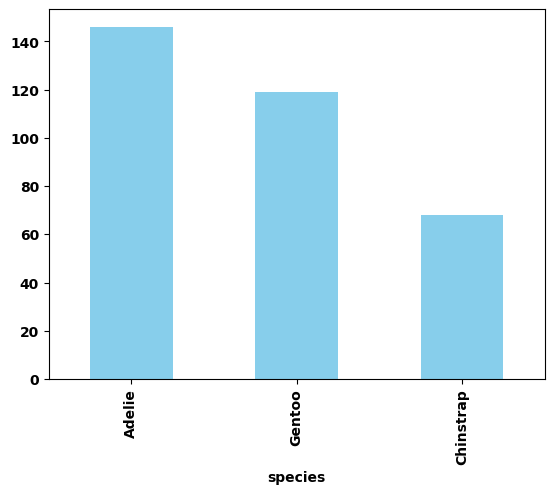

In [39]:
df_cleaned['species'].value_counts().plot(kind='bar', color='skyblue')

<Axes: ylabel='count'>

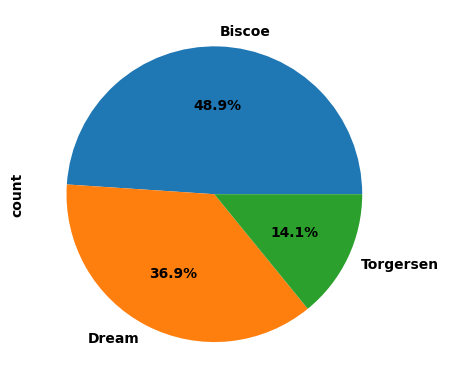

In [40]:
df_cleaned['island'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: ylabel='sex'>

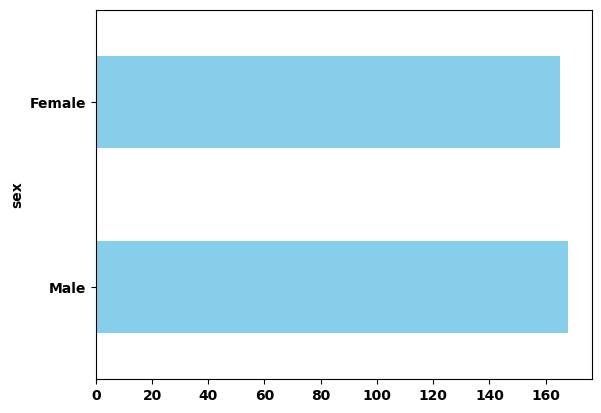

In [41]:
df_cleaned['sex'].value_counts().plot(kind='barh', color='skyblue')

Plot numerical variables:

1. Boxplot: `bill_length_mm`
1. Histogram: `bill_depth_mm`
1. Boxplot: `flipper_length_mm`
1. Histogram: `body_mass_g`

<Axes: xlabel='bill_length_mm'>

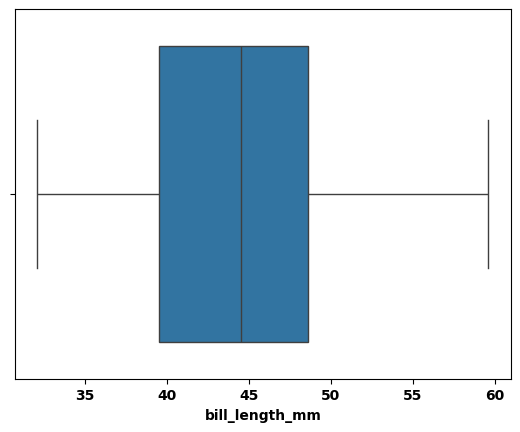

In [42]:
sns.boxplot(x=df_cleaned["bill_length_mm"])

<Axes: xlabel='bill_depth_mm', ylabel='Count'>

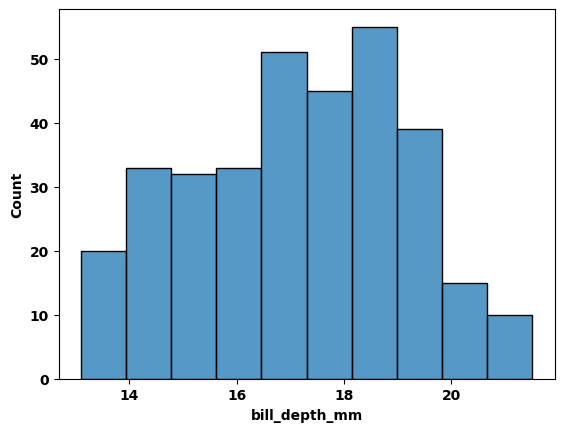

In [43]:
sns.histplot(df_cleaned["bill_depth_mm"])

<Axes: xlabel='flipper_length_mm'>

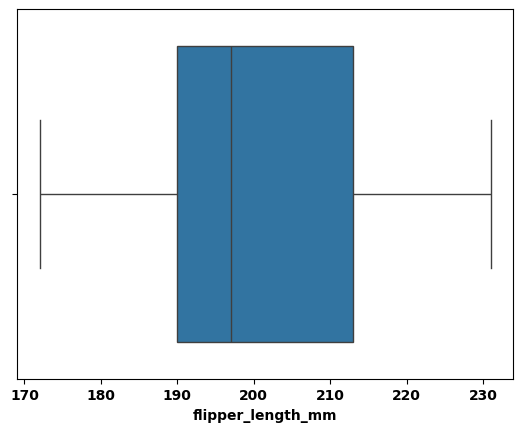

In [44]:
sns.boxplot(x=df_cleaned["flipper_length_mm"])

<Axes: xlabel='body_mass_g', ylabel='Count'>

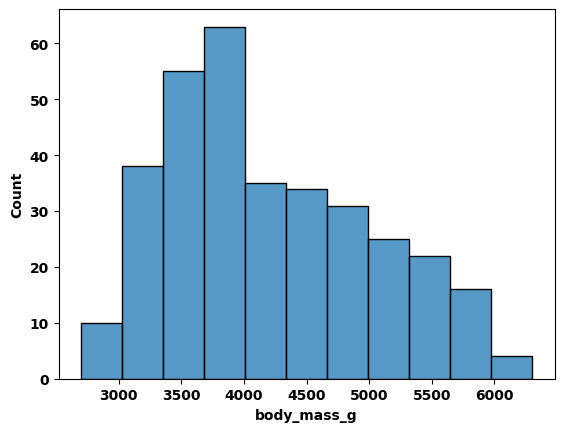

In [45]:
sns.histplot(df_cleaned["body_mass_g"])

## Step 7: Bivariate Analysis

#### Correlation between numerical features

Let's find out if there is any correlation between numerical features.

- Hint: you can use the `df.corr()` to find the correlation matrix.
- Hint: you can use `sns.heatmap()` to plot the correlation matrix

In [46]:
correlation_matrix=df_num.corr()
correlation_matrix

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


<Axes: >

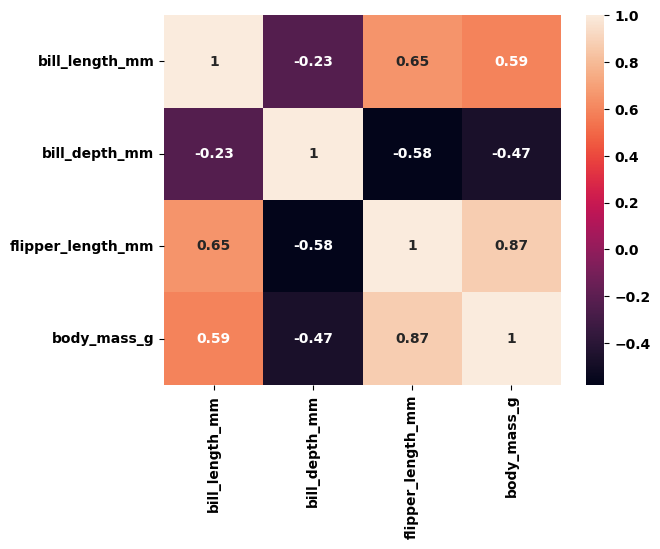

In [47]:
sns.heatmap(correlation_matrix, annot=True)

Write down your observations based on the correlation heatmap.

Observations:

- body mass and bill length, flipper length and bill length have a highly strong positive correlation (correlation coefficient of 0.59 and 0.65 respectivly).

- bill length and bill depth, body mass and bill depth, flipper length and bill depth, have strong negative correlation (correlation coefficient of -0.23, -0.47 and -0.58 respectivly).

- body mass and flipper length ahave the highest strong positive correlation (correlation coefficient of 0.87, closest to 1)
  


### Feature Engineering

- We might try adding the feature `bill_size` which is the product of `bill_length` and `bill_depth` to see if it has any significance in the model.
- We might also try `bill_ratio` which is the ratio of `bill_length` to `bill_depth` to see if it has any significance in the model.

In [48]:
df_num['bill_size']= df_num['bill_length_mm'] * df_num['bill_depth_mm']
df_num['bill_ratio'] = df_num['bill_length_mm'] / df_num['bill_depth_mm']

In [49]:
df_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,bill_size,bill_ratio
0,39.099998,18.700001,181.0,3750.0,731.169983,2.090909
1,39.500000,17.400000,186.0,3800.0,687.299988,2.270115
2,40.299999,18.000000,195.0,3250.0,725.399963,2.238889
4,36.700001,19.299999,193.0,3450.0,708.309998,1.901554
5,39.299999,20.600000,190.0,3650.0,809.580017,1.907767


In [50]:
correlation_matrix=df_num.corr()
correlation_matrix

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,bill_size,bill_ratio
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.661467,0.779230
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,0.575513,-0.781246
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.086512,0.801980
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.104220,0.702179
bill_size,0.661467,0.575513,0.086512,0.104220,1.000000,0.048658
bill_ratio,0.779230,-0.781246,0.801980,0.702179,0.048658,1.000000


Let's look at the correlation to see whether the newly created features are better.

<Axes: >

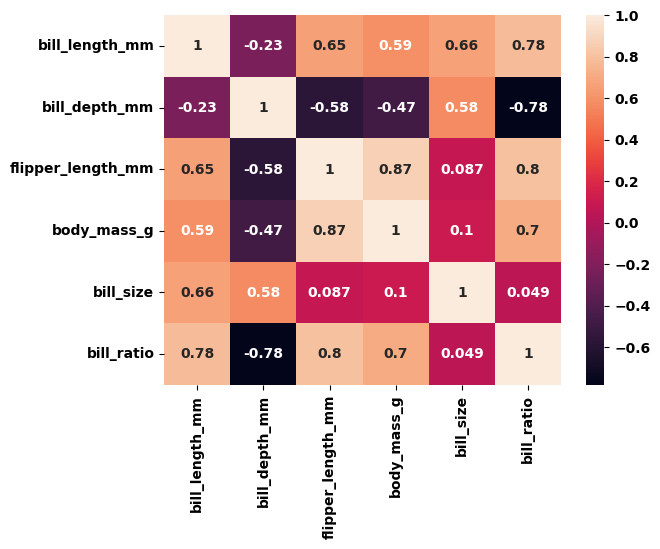

In [51]:
sns.heatmap(correlation_matrix, annot=True)

<Axes: >

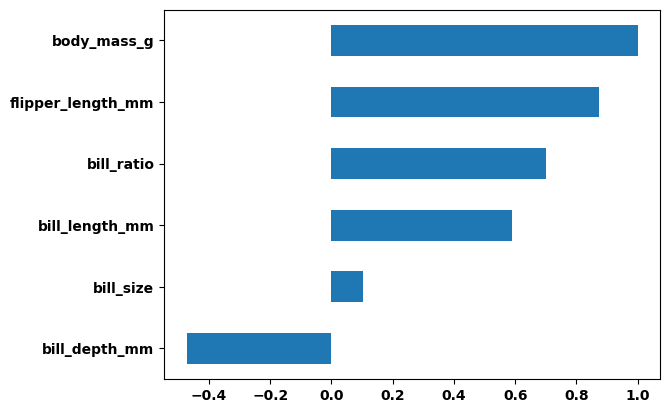

In [52]:
# This plots the correlation values for a specific column
# which is usually what we are interested in

correlation_matrix['body_mass_g'].sort_values().plot.barh()